In [117]:
# Specs:
# 4 seed families : Canopy, Tree Stratum, Understorey, Shrub Layer.
# Must place 3 seed of different layers in each square meter.
# Seeds must be randomly distributed across the whole area.

length = 20
width = 20

area_size = length * width
seeds_count = area_size * 3

print("area_size : {}".format(area_size))
print("seeds_count : {}".format(seeds_count))


area_size : 400
seeds_count : 1200


In [118]:
from enum import Enum 
import numpy as np
import random

seeds = {
'canopy' : 500,
'tree_stratum' : 1400,
'understorey' : 1300,
'shrub_layer' : 1300
}

seeds_percent = {
'canopy' : 0.25,
'tree_stratum' : 0.25,
'understorey' : 0.25,
'shrub_layer' : 0.25
}

seed_percent_list = list(seeds_percent.values())
seed_families = list(seeds.keys())

print("seed_families :")
print(seed_families)

def countSeeds(area_list):
    seed_types = list(seeds.keys())
    result = dict.fromkeys(seed_types, 0)
    print(result)
    for x in area_list:
        for seed_type in x:
            result[seed_type] += 1
    
    return result

def print_distribution(area_list):
    result = countSeeds(area_list)
    for seed_type, seed_nb in result.items():
        print("{} : {} ({}%)".format(seed_type, seed_nb, (seed_nb / seeds_count) * 100))

seed_families :
['canopy', 'tree_stratum', 'understorey', 'shrub_layer']


In [119]:
def decrementSeedNumber(key):
    seeds[key] -= 1
   
    if (seeds[key] <= 0):  # removing from list if no seeds left
        seed_families.remove(key)
    
def getSeedsForSquare():
    my_selection = np.random.choice(seed_families, size=(len(seed_families)-1), replace=False)
    for seedName in my_selection:
        decrementSeedNumber(seedName)
        
    return my_selection
    
# validation 
seed_sum = sum(seeds.values())

if (seed_sum != seeds_count) :
    print("The seed sum is {} and must be {}".format(seed_sum, seeds_count))

The seed sum is 4500 and must be 1200


In [120]:
area = []

for i in range(area_size) :
    area.append(getSeedsForSquare())

# Shuffle the area to avoid lack of one seed family at the end of the list.
# e.g: if there is 20% of one family the stock will go empty pretty fast 
# and the distribution won't be uniform accross the area.
random.shuffle(area)

print_distribution(area)

print("area length : {}".format(len(area)))
#print(area)

# reshape list to square area
#square_area = np.array(area).reshape(length, width, -1)



# Need to validate seed number at first since we can lack one seed family in 
# the end which will make some square meters fail the "3 different seeds" condition
# we need to ensure the pourcentage of each seed family is right


{'canopy': 0, 'tree_stratum': 0, 'understorey': 0, 'shrub_layer': 0}
canopy : 301 (25.083333333333336%)
tree_stratum : 291 (24.25%)
understorey : 311 (25.916666666666664%)
shrub_layer : 297 (24.75%)
area length : 400


In [121]:
def getSeedsForSquare2():
#     print(seed_percent_list)
    my_selection = np.random.choice(list(seeds.keys()), 3, p=seed_percent_list, replace=False)
    
    return sorted(my_selection)  


area2 = []

for i in range(area_size) :
    area2.append(getSeedsForSquare2())

#print(area)
print("area length : {}".format(len(area2)))
print_distribution(area2)

print("area length : {}".format(len(area2)))

#print(len(np.array(area2)))
#print(np.array(area2).size)

# reshape list to square area
#square_area2 = np.array(area2).reshape(length, width, -1)

#print(square_area2)



area length : 400
{'canopy': 0, 'tree_stratum': 0, 'understorey': 0, 'shrub_layer': 0}
canopy : 311 (25.916666666666664%)
tree_stratum : 301 (25.083333333333336%)
understorey : 292 (24.333333333333336%)
shrub_layer : 296 (24.666666666666668%)
area length : 400
400
1200
[[['canopy' 'tree_stratum' 'understorey']
  ['canopy' 'shrub_layer' 'tree_stratum']
  ['shrub_layer' 'tree_stratum' 'understorey']
  ..., 
  ['canopy' 'tree_stratum' 'understorey']
  ['canopy' 'shrub_layer' 'understorey']
  ['canopy' 'shrub_layer' 'understorey']]

 [['shrub_layer' 'tree_stratum' 'understorey']
  ['canopy' 'shrub_layer' 'tree_stratum']
  ['canopy' 'tree_stratum' 'understorey']
  ..., 
  ['canopy' 'shrub_layer' 'tree_stratum']
  ['canopy' 'shrub_layer' 'understorey']
  ['shrub_layer' 'tree_stratum' 'understorey']]

 [['shrub_layer' 'tree_stratum' 'understorey']
  ['canopy' 'tree_stratum' 'understorey']
  ['canopy' 'shrub_layer' 'tree_stratum']
  ..., 
  ['shrub_layer' 'tree_stratum' 'understorey']
  ['cano

In [122]:
def rand_jitter(arr):
    return arr + np.random.uniform(low=0.1, high=0.9, size=len(arr))


def getCoordinates(case_index):
    x = float(case_index % length)
    y = float(case_index // length)
    return x, y

def separateSeeds(linear_area):
    result = {key: {'x' : [], 'y' : []} for key in seeds.keys()}
    
    for case_index, square in enumerate(linear_area):
        for seed in square:
            x,y = getCoordinates(case_index)
            result[seed]['x'].append(x)
            result[seed]['y'].append(y)
    
    return result

coordinates_per_seed_type = separateSeeds(area2)



<IPython.core.display.Javascript object>


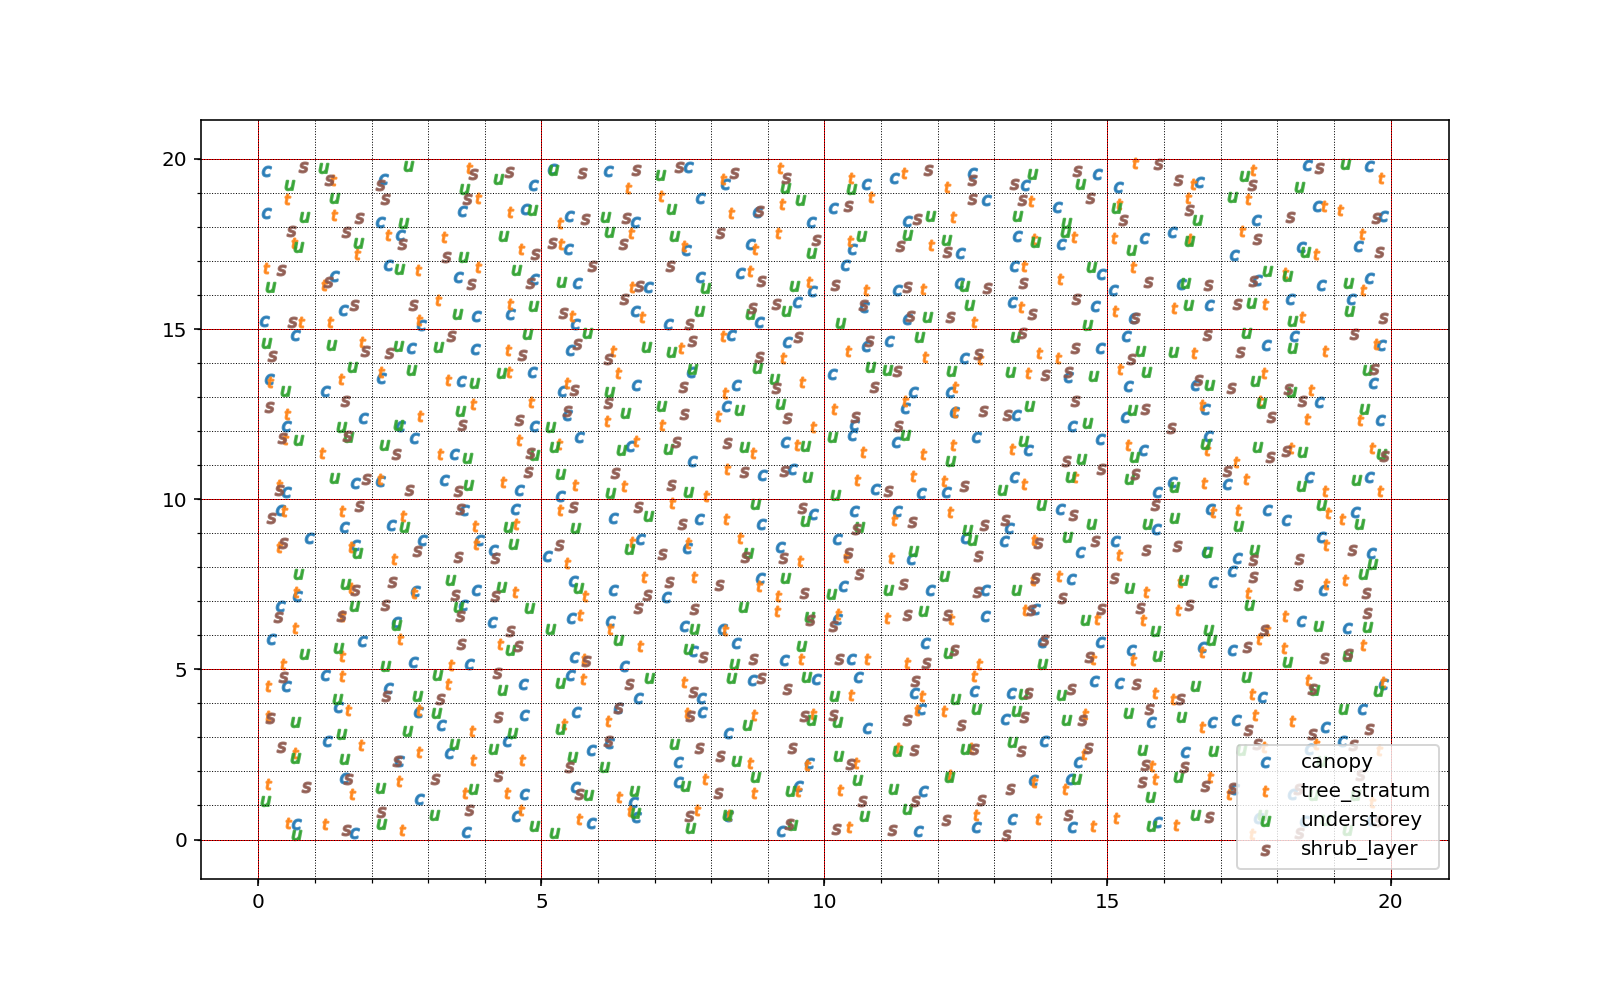

In [127]:
%matplotlib notebook
#import mpld3
#mpld3.enable_notebook()

np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
#fig = plt.figure(figsize=(18, 18))

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, **kwargs):
    return ax.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, **kwargs)


scale = 500/length
seed_color = {
'canopy' : 'tab:blue',
'tree_stratum' : 'tab:orange',
'understorey' : 'tab:green',
'shrub_layer' : 'tab:brown'
}

for seed_type, coordinates in coordinates_per_seed_type.items():
    marker_letter = seed_type[:1] # first letter
    jitter(coordinates.get('x'), coordinates.get('y'), c=seed_color.get(seed_type), s=scale, label=seed_type,
               alpha=0.8, marker="${}$".format(marker_letter))
    
#for color in ['tab:blue', 'tab:orange', 'tab:green']:
#    n = 750
#    x, y = 100 * np.random.rand(2, n)
#    scale = 200.0 * np.random.rand(n)
#    ax.scatter(x, y, c=color, s=scale, label=color,
#               alpha=0.3, edgecolors='none')

ax.legend()
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, length + 1, 5)
minor_ticks = np.arange(0, length + 1 , 1)
#
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
#
## And a corresponding grid
ax.grid(which='both')
#ax.grid(True)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#
#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [124]:


#import matplotlib.pyplot as plt, mpld3
#plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
#html_fig = mpld3.fig_to_html(fig)
#import base64
#from io import BytesIO


# layer|type|seed_count


